# Machine Learning 1 - Nearest Neighbors and Decision Trees

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

In [1]:
from lab_tools import CIFAR10, get_hog_image

dataset = CIFAR10('CIFAR10/')

Pre-loading training data
Pre-loading test data


# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(n_neighbors=1)

* What is the **descriptive performance** of this classifier ?
* Modify the code to estimate the **predictive performance**.
* Use cross-validation to find the best hyper-parameters for this method.

In [ ]:
from sklearn.metrics import accuracy_score

#Descriptive performances
pred_train = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

In [ ]:
#Cross-Validation 
from sklearn.model_selection import cross_val_score,StratifiedKFold
n_neighbors = list(range(1,50))
#stratified_kfold = StratifiedKFold(n_splits=5)
scores = []
for i in range(len(n_neighbors)):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors[i])
    cv_scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'],cv=5)
    scores.append(cv_scores.mean())

print("Max accuracy:", max(scores))
print("Best number of neighbors:", n_neighbors[scores.index(max(scores))])

In [ ]:
clf_best = KNeighborsClassifier(n_neighbors=5)
clf_best.fit( dataset.train['hog'], dataset.train['labels'] )
#Descriptive performances
pred_train = clf_best.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)
#Predictive performances
pred_test = clf_best.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

In [7]:
import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Use cross-validation to find the best hyper-parameters for this method.

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(dataset.train['hog'], dataset.train['labels'])

In [ ]:
#Descriptive performances
pred_train = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

Decision trees aren't working well for this task. This because the nature of this model it's not so much related to image analysis. 

In [ ]:
#Cross-validationn
hparam1 = ['gini', 'entropy', 'log_loss'] #criterion
hparam2 = ['best', 'random'] #splitter


scores = []
for i in range(len(hparam1)):
    for j in range(len(hparam2)):
            clf = tree.DecisionTreeClassifier(
                criterion=hparam1[i],
                splitter=hparam2[j],
            )
            cv_scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'],cv=5)
            scores.append(cv_scores.mean())

print("Max accuracy:", max(scores))  
print("we have", len(scores), "possible options and the best one is",scores.index(max(scores)))
print("The optimal setting is 'gini', 'best' that is the default setting.")

In [ ]:
clf_best = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
clf_best = clf_best.fit(dataset.train['hog'], dataset.train['labels'])

In [ ]:
#Predictive performances
pred_test = clf_best.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* Use cross-validation to find the best hyper-paramters for this method.

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(dataset.train['hog'],dataset.train['labels'])

RandomForestClassifier()

In [4]:
from sklearn.metrics import accuracy_score
#Descriptive performances
pred_train1 = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train1)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test1 = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test1)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 1.0
The accuracy on test set is: 0.768


In [5]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train1)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test1)
print(cm2)

[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]
[[788 163  49]
 [129 734 137]
 [ 51 167 782]]


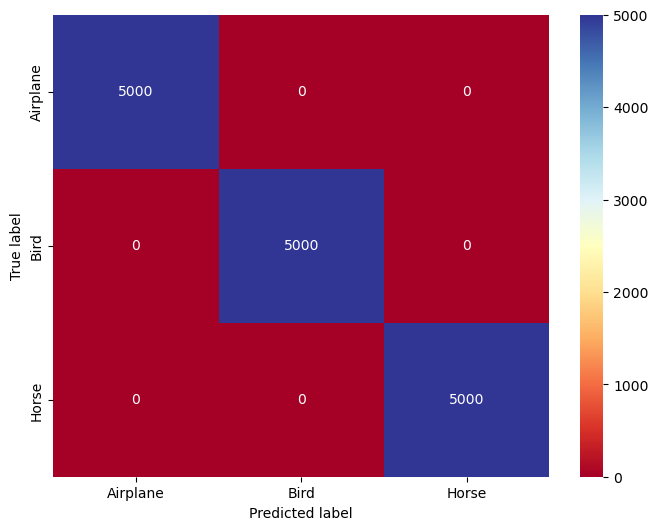

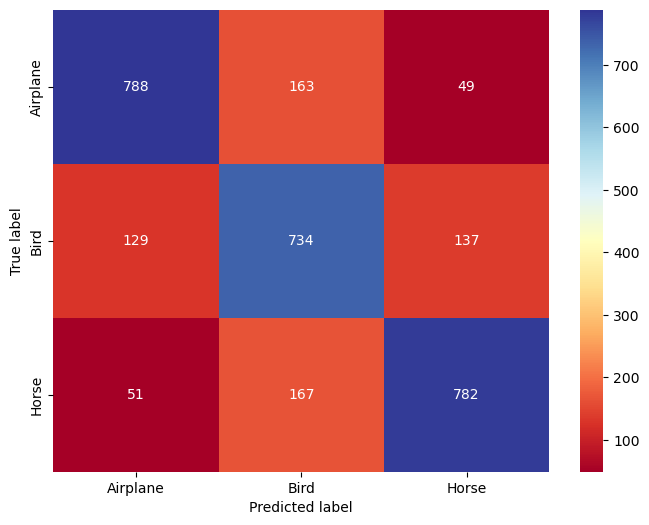

In [10]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

In [12]:
from sklearn.model_selection import cross_val_score
#Cross-validation
hparam = [20, 50, 80, 100, 120,150, 180, 200] #criterion

scores = []
for j in range(len(hparam)):
    clf = RandomForestClassifier(
            n_estimators=hparam[j]
    )
    cv_scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'],cv=3)
    scores.append(cv_scores.mean())

print("Max accuracy:", max(scores))  
print("we have", len(scores), "possible options and the best one is",scores.index(max(scores)))
print("So the best setting is the default.")

Max accuracy: 0.7645333333333332
we have 8 possible options and the best one is 6
So the best setting is the default.


In [13]:
clf_best = RandomForestClassifier(n_estimators=150)
clf_best = clf_best.fit(dataset.train['hog'], dataset.train['labels'])

In [14]:
#Descriptive performances
pred_train = clf_best.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf_best.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 1.0
The accuracy on test set is: 0.7696666666666667


In [15]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]
[[782 167  51]
 [123 739 138]
 [ 59 153 788]]


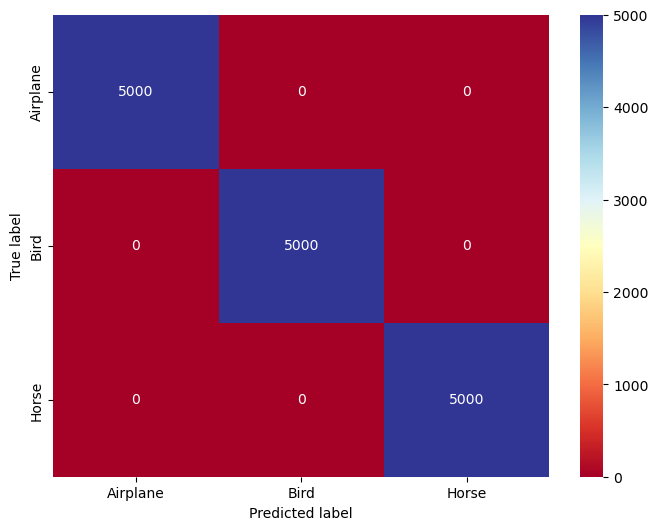

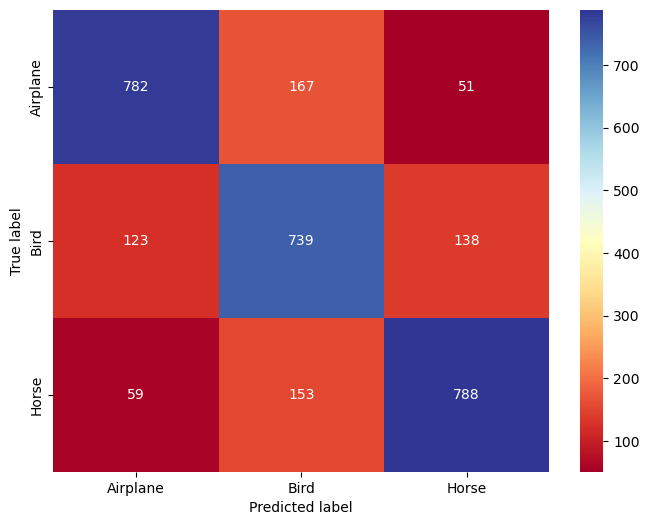

In [16]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)